In [3]:
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
from shutil import copyfile
import cv2


In [4]:
data=cv2.imread("C:/Users/Dareen/OneDrive/Desktop/tensor/kagglecatsanddogs_5340/PetImages")

In [8]:
print("Number of cat images:",len(os.listdir("C:/Users/Dareen/OneDrive/Desktop/tensor/kagglecatsanddogs_5340/PetImages/Cat")))
print("Number of dog images:", len(os.listdir('C:/Users/Dareen/OneDrive/Desktop/tensor/kagglecatsanddogs_5340/PetImages/Dog')))

Number of cat images: 12501
Number of dog images: 12501


In [11]:
try:
    os.mkdir('C:/Users/Dareen/OneDrive/Desktop/tensor/kagglecatsanddogs_5340/PetImages/cats-v-dogs')
    os.mkdir('C:/Users/Dareen/OneDrive/Desktop/tensor/kagglecatsanddogs_5340/PetImages/cats-v-dogs/training')
    os.mkdir('C:/Users/Dareen/OneDrive/Desktop/tensor/kagglecatsanddogs_5340/PetImages/cats-v-dogs/testing')
    os.mkdir('C:/Users/Dareen/OneDrive/Desktop/tensor/kagglecatsanddogs_5340/PetImages/cats-v-dogs/training/cats')
    os.mkdir('C:/Users/Dareen/OneDrive/Desktop/tensor/kagglecatsanddogs_5340/PetImages/cats-v-dogs/training/dogs')
    os.mkdir('C:/Users/Dareen/OneDrive/Desktop/tensor/kagglecatsanddogs_5340/PetImages/cats-v-dogs/testing/cats')
    os.mkdir('C:/Users/Dareen/OneDrive/Desktop/tensor/kagglecatsanddogs_5340/PetImages/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [ ]:
import random
from shutil import copyfile
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "C:/Users/Dareen/OneDrive/Desktop/tensor/kagglecatsanddogs_5340/PetImages/Cat/"
TRAINING_CATS_DIR = "C:/Users/Dareen/OneDrive/Desktop/tensor/kagglecatsanddogs_5340/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "C:/Users/Dareen/OneDrive/Desktop/tensor/kagglecatsanddogs_5340/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "C:/Users/Dareen/OneDrive/Desktop/tensor/kagglecatsanddogs_5340/PetImages/Dog/"
TRAINING_DOGS_DIR = "C:/Users/Dareen/OneDrive/Desktop/tensor/kagglecatsanddogs_5340/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "C:/Users/Dareen/OneDrive/Desktop/tensor/kagglecatsanddogs_5340/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)


666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [ ]:

print("Number of training cat images", len(os.listdir('C:/Users/Dareen/OneDrive/Desktop/tensor/kagglecatsanddogs_5340/cats-v-dogs/training/cats/')))
print("Number of training dog images", len(os.listdir('C:/Users/Dareen/OneDrive/Desktop/tensor/kagglecatsanddogs_5340/cats-v-dogs/training/dogs/')))
print("Number of testing cat images", len(os.listdir('C:/Users/Dareen/OneDrive/Desktop/tensor/kagglecatsanddogs_5340/cats-v-dogs/testing/cats/')))
print("Number of testing dog images", len(os.listdir('C:/Users/Dareen/OneDrive/Desktop/tensor/kagglecatsanddogs_5340/cats-v-dogs/testing/dogs/')))


Number of training cat images 12264
Number of training dog images 12228
Number of testing cat images 3514
Number of testing dog images 3478


In [ ]:
TRAINING_DIR = "C:/Users/Dareen/OneDrive/Desktop/tensor/kagglecatsanddogs_5340/cats-v-dogs/training/"

train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "C:/Users/Dareen/OneDrive/Desktop/tensor/kagglecatsanddogs_5340/cats-v-dogs/testing/"

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 24490 images belonging to 2 classes.
Found 6991 images belonging to 2 classes.


In [ ]:
weights_file = "C:/Users/Dareen/Downloads/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"


pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)

pre_trained_model.load_weights(weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

In [33]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

In [35]:

model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])


history = model.fit(
            train_generator,
            validation_data=validation_generator,
            epochs=2,
            verbose=1)

c:\Users\Dareen\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
204/245 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - acc: 0.8689 - loss: 0.3398

c:\Users\Dareen\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\TiffImagePlugin.py:890: UserWarning: Truncated File Read
  warnings.warn(str(msg))


245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8760 - loss: 0.3185

c:\Users\Dareen\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


245/245 ━━━━━━━━━━━━━━━━━━━━ 346s 1s/step - acc: 0.8762 - loss: 0.3180 - val_acc: 0.9720 - val_loss: 0.0738
Epoch 2/2
245/245 ━━━━━━━━━━━━━━━━━━━━ 345s 1s/step - acc: 0.9371 - loss: 0.1467 - val_acc: 0.9750 - val_loss: 0.0662


In [38]:
validation_loss, validation_accuracy = model.evaluate(validation_generator)

print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")


70/70 ━━━━━━━━━━━━━━━━━━━━ 45s 647ms/step - acc: 0.9732 - loss: 0.0660
Validation Loss: 0.06616734713315964
Validation Accuracy: 0.9749678373336792


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted: Dog


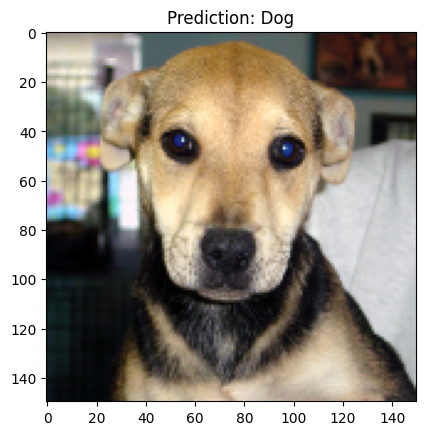

In [39]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img_path = "C:/Users/Dareen/OneDrive/Desktop/tensor/kagglecatsanddogs_5340/cats-v-dogs/training/dogs/4.jpg"  


img = image.load_img(img_path, target_size=(150, 150))  
img_array = image.img_to_array(img)  
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.0  


prediction = model.predict(img_array)

if prediction[0] > 0.5:
    print("Predicted: Dog")
else:
    print("Predicted: Cat")


plt.imshow(img)
plt.title(f"Prediction: {'Dog' if prediction[0] > 0.5 else 'Cat'}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted: Cat


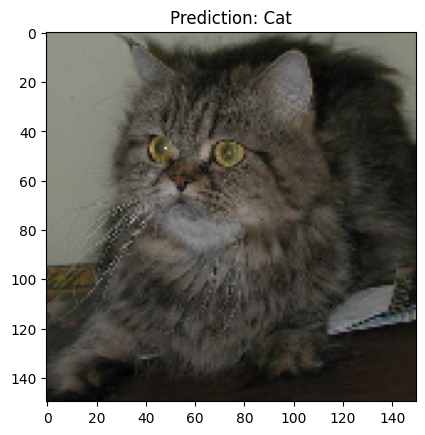

In [40]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img_path = "C:/Users/Dareen/OneDrive/Desktop/tensor/kagglecatsanddogs_5340/cats-v-dogs/training/cats/86.jpg"  


img = image.load_img(img_path, target_size=(150, 150))  
img_array = image.img_to_array(img)  
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.0  


prediction = model.predict(img_array)

if prediction[0] > 0.5:
    print("Predicted: Dog")
else:
    print("Predicted: Cat")


plt.imshow(img)
plt.title(f"Prediction: {'Dog' if prediction[0] > 0.5 else 'Cat'}")
plt.show()
